<h1><u><b>Introduction Random Forest</u></b></h1>

`Random Forest is a powerful machine learning technique that utilises a bunch of decision trees to get a more accurate prediction.`
Imagine of a forest(pun intended) where each tree makes a decision based on a set of rules.By combining the predictions of these numerous trees ,you get a more robust and reliable outcome.

In this notebook we will implement random forest.
<ol>
<li><b>Building the trees</b>- Random forests builds multiple decision trees.Each tree is buid on a subset of the data,with some features randomly selected for splitting decisions at each node.This randomness helps prevent the trees from becoming overly reliant on specific features and reduces the risk of overfitting.
<li><b>Classification</b>-  When it comes to classification problems (like predicting whether an email is spam or not), the final prediction is based on the majority vote from all the trees in the forest. The class that receives the most votes wins.
<li><b>Averaging the Predictions (Regression)</b>- For regression problems (like predicting house prices), the final prediction is the average of the predictions from all the trees.



In [36]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [37]:
# Step 1: Load the datasets
# For classification, we'll use the Iris dataset
iris = sns.load_dataset('iris')

In [38]:
# For regression, we'll use the California Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target

In [39]:

# Step 2: Explore the datasets
print("Iris Dataset:")
print(iris.head())
print("\nCalifornia Housing Dataset:")
print(california_df.head())

Iris Dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

California Housing Dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3   

In [40]:
# Step 3: Preprocess the data
# Iris dataset preprocessing for classification
iris['species'] = iris['species'].astype('category').cat.codes
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']


In [41]:
# California Housing dataset preprocessing for regression
X_california = california_df.drop('MedHouseVal', axis=1)
y_california = california_df['MedHouseVal']


In [42]:
# Step 4: Split the data into training and testing sets
# For classification
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [43]:
# For regression
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)


In [44]:
# Step 5: Train the Random Forest models
# Classification
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_iris, y_train_iris)

RandomForestClassifier(random_state=42)

In [45]:
# Regression
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_california, y_train_california)


RandomForestRegressor(random_state=42)

In [46]:
# Step 6: Make predictions
# Classification
y_pred_iris = clf.predict(X_test_iris)

In [47]:
# Regression
y_pred_california = reg.predict(X_test_california)


In [48]:
# Step 7: Evaluate the models
# Classification
accuracy = accuracy_score(y_test_iris, y_pred_iris)
conf_matrix = confusion_matrix(y_test_iris, y_pred_iris)
class_report = classification_report(y_test_iris, y_pred_iris)


In [49]:
print("\nClassification Model Accuracy:")
print(accuracy)



Classification Model Accuracy:
1.0


In [50]:
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [51]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



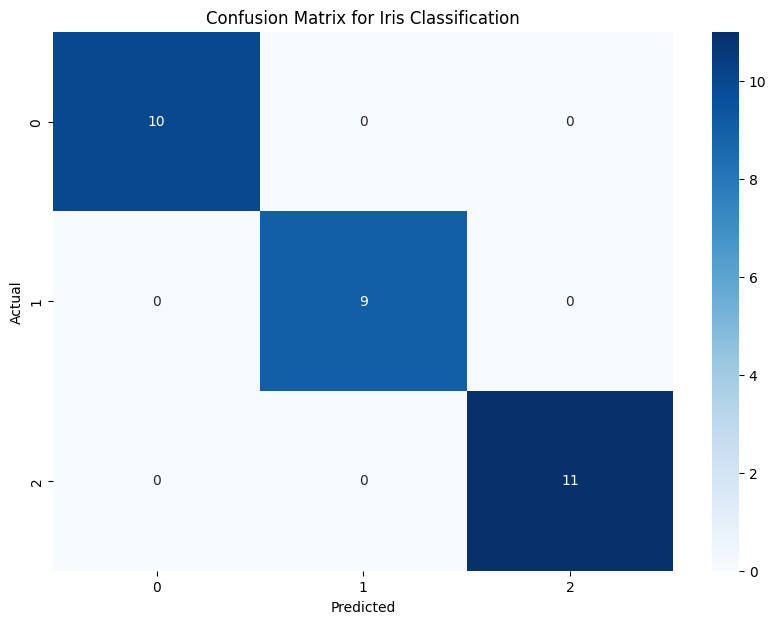

In [52]:
# Visualizing the confusion matrix for classification
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Iris Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
# Regression
mse = mean_squared_error(y_test_california, y_pred_california)
r2 = r2_score(y_test_california, y_pred_california)

In [54]:
print("\nRegression Model Mean Squared Error:")
print(mse)



Regression Model Mean Squared Error:
0.2553684927247781


In [55]:
print("\nRegression Model R2 Score:")
print(r2)



Regression Model R2 Score:
0.8051230593157366


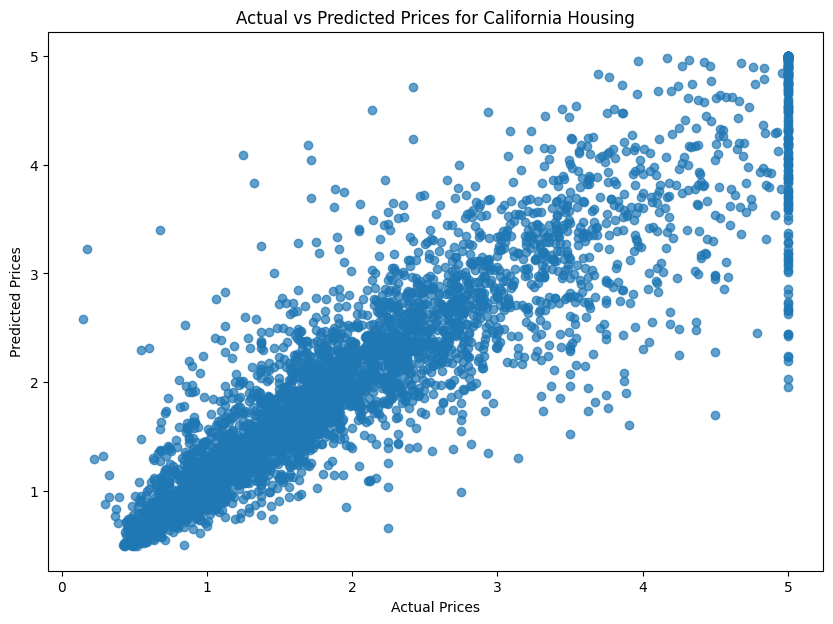

In [56]:
# Visualizing the predictions for regression
plt.figure(figsize=(10, 7))
plt.scatter(y_test_california, y_pred_california, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices for California Housing')
plt.show()


In [57]:
# Feature importance for both models
# Classification
importances_clf = clf.feature_importances_
indices_clf = np.argsort(importances_clf)[::-1]
features_clf = X_iris.columns

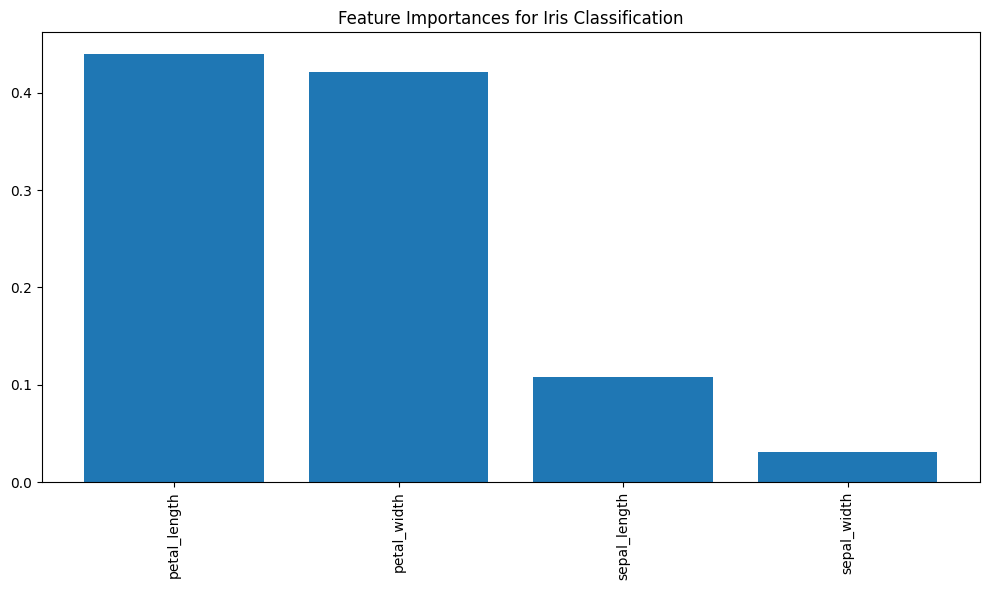

In [58]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Iris Classification")
plt.bar(range(X_iris.shape[1]), importances_clf[indices_clf], align="center")
plt.xticks(range(X_iris.shape[1]), [features_clf[i] for i in indices_clf], rotation=90)
plt.tight_layout()
plt.show()


In [59]:
# Regression
importances_reg = reg.feature_importances_
indices_reg = np.argsort(importances_reg)[::-1]
features_reg = X_california.columns

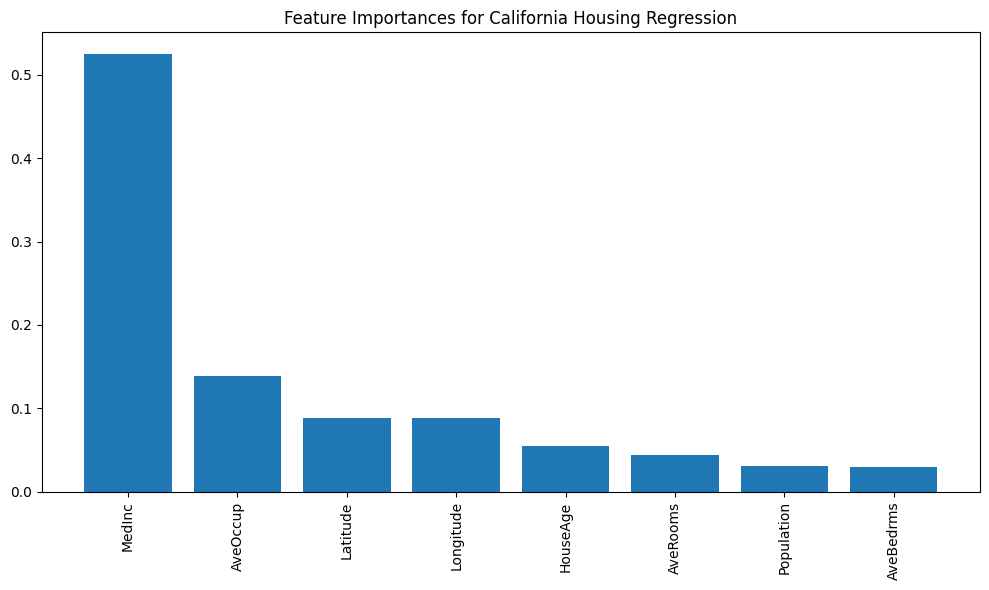

In [60]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for California Housing Regression")
plt.bar(range(X_california.shape[1]), importances_reg[indices_reg], align="center")
plt.xticks(range(X_california.shape[1]), [features_reg[i] for i in indices_reg], rotation=90)
plt.tight_layout()
plt.show()


In [61]:
# Save the models (optional)
joblib.dump(clf, 'random_forest_classifier.pkl')
joblib.dump(reg, 'random_forest_regressor.pkl')

['random_forest_regressor.pkl']

In [62]:
# Load the models (optional)
loaded_clf = joblib.load('random_forest_classifier.pkl')
loaded_reg = joblib.load('random_forest_regressor.pkl')
result_clf = loaded_clf.score(X_test_iris, y_test_iris)
result_reg = loaded_reg.score(X_test_california, y_test_california)
print("\nLoaded Classification Model Accuracy:")
print(result_clf)
print("\nLoaded Regression Model R2 Score:")
print(result_reg)


Loaded Classification Model Accuracy:
1.0

Loaded Regression Model R2 Score:
0.8051230593157366
